## Name: Anushk Naval  Roll:18046

This exercise is deceptively simple in its description: build at least two neural networks that achieve 97% or better validation accuracy on the MNIST dataset without using convolutional layers. Once you have (at least) two such networks, evaluate their performance on the test data and compare the results.

In your endeavor to achieve this result, apply the scientific method and iteratively improve your models. Start by forming a hypothesis about network architecture, specifically:

Q. How many layers, and how many nodes per layer should I start with?

Ans. We should start with 1 layer.

Q. Where should I apply dropout layers, and what percent dropout should I use in those layers?

Ans. Dropout will be applied on connected layers between 10% to 30%

Q. Which activation function should I use on these layers?

Ans. Sigmoid, relu , seoftmax can be used for activation.

Q. Which loss function should I use?

Ans. categorical_crossentropy

Q. Which optimizer should I use?

Ans. sgd

Q Should I enable early stopping?
* What parameters should I use related to early stopping?

Ans. No, early stopping shouldn't be enabled.
* keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

### Further
Write the code to build and train the model. Once you've trained the model and seen its validation scores, make a change to some aspect of your network (seriously consider making just one change at a time), and re-evaluate. With each change, make a note of the change and document how that change impacted performance—being explicit and documenting these impacts is not just a good scientific practice, it will help you learn and build an intuition for how changes might impact results.

## **Data import and formatting**

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [22]:
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical

num_classes = 10 
image_size = 784

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)


**History function**

In [5]:
def plot_training_history(history, model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

### Model 1

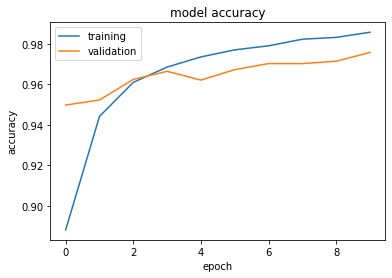

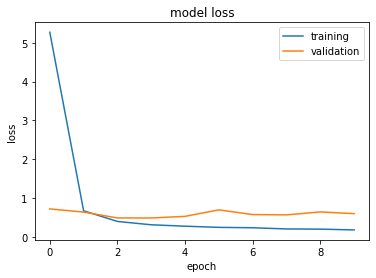

Test loss: 0.644
Test accuracy: 0.971
Time for training the model: 14.598954439163208 sec


In [20]:
model_1 = Sequential()
model_1.add(Dense(units=350, activation='relu', input_shape=(image_size,)))
model_1.add(Dense(units=num_classes, activation='softmax'))

model_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
history = model_1.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=False, validation_split=.1)
end = time.time()

plot_training_history(history, model_1)
print('Time for training the model:',end - start,'sec')

### Model 2

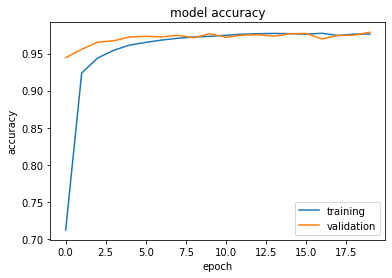

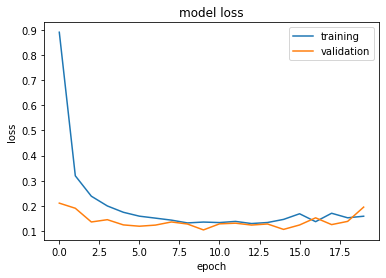

Test loss: 0.182
Test accuracy: 0.974
Time for training the model: 49.25951862335205 sec


In [23]:
model_2 = Sequential()
model_2.add(Dense(units=100, activation='relu', input_shape=(image_size,)))
    
for _ in range(10):
    model_2.add(Dense(units=100, activation='relu'))
    model_2.add(Dropout(rate=0.1))

model_2.add(Dense(units=num_classes, activation='softmax'))
model_2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
history = model_2.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
end = time.time()

plot_training_history(history, model_2)
print('Time for training the model:',end - start,'sec')

### Observations:

* After multiple execution using optimizer rmsprop and relu as activation the model performed better compared to that of relu and sgd.
* Accuracy for models are 97.1% with 14.6 sec runtime for model 1 and accuracy of 97.4% with runtime of 49.3 sec runtime for model 2 